## Investigation of triggered seismicity near Geysers Geothermal field due to M8.2 Chignik Earthquake.

Author - Akash Kharita, Final year Geophysics student, Indian Institution of Technology Roorkee,
29 August, 2021 <br>
Licence - Creative Commons Attribution 4.0 (CC-BY) - https://creativecommons.org/licenses/ <br>
You are allowed to share and use the information here as long as you give the appropriate credit. 

#### Geysers is the world's largest geothermal field and contains several geothermal power plants. Speaking of seismicity, number of earthquakes have increased significantly in the area due to water injection process. it is however, unlikely that there will ever be a major earthquake at the site because of absence of major faults in the region.<br>

In this jupyter notebook, I will try to investigate the effect of M8.2 Chignik earthquake near Geysers, I will do the following steps - 

1) Download all the available waveform data within 1 degree radius from Geysers <br>
2) Rotating the waveforms <br>
3) Observing the filtered waveforms(2-8Hz) and Unfiltered waveforms, selecting the good quality waveforms. <br>
4) Checking for correspondence between surface wave arrival and locally triggered earthquakes. <br>
5) Checking the available event catalog to see the rates of earthquakes swarms before and after the event and also checking for the delayed response. 

In [1]:
## Importing necessary dependencies
import obspy
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
from glob import glob
import os
import matplotlib as mpl
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
import warnings 
warnings.filterwarnings('ignore')

In [2]:
lat,lon = 38.790556, -122.755833

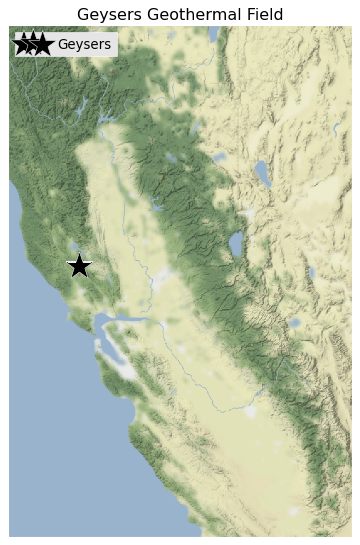

In [236]:
#%matplotlib notebook
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection = ccrs.Mercator())
ax.set_extent([-124,-118,35,42])
#ax.coastlines(resolution='10m')
stamen_terrain = cimgt.Stamen('terrain-background') ##maps.stamen.com
ax.add_image(stamen_terrain,7)
plt.scatter(lon,lat,c='black',marker='*',transform=ccrs.PlateCarree(),label='Geysers',s=700)
plt.title('Geysers Geothermal Field')
plt.legend(loc='upper left')
plt.show()

## 1) Downloading the waveforms

Obspy's mass downloader downloads the events from all the available datacentres

In [7]:
import obspy
from obspy.clients.fdsn.mass_downloader import CircularDomain, \
    Restrictions, MassDownloader

origin_time = obspy.UTCDateTime(2021, 7, 29, 6, 15, 49)

# Circular domain around the epicenter. This will download all data between
# 70 and 90 degrees distance from the epicenter. This module also offers
# rectangular and global domains. More complex domains can be defined by
# inheriting from the Domain class.
domain = CircularDomain(latitude=38.790556, longitude= -122.755833,
                        minradius=0.0, maxradius=1.0)

restrictions = Restrictions(
    # Get data from 5 minutes before the event to one hour after the
    # event. This defines the temporal bounds of the waveform data.
    starttime=origin_time - 0 * 60,
    endtime=origin_time + 3600,
    # You might not want to deal with gaps in the data. If this setting is
    # True, any trace with a gap/overlap will be discarded.
    reject_channels_with_gaps=True,
    # And you might only want waveforms that have data for at least 95 % of
    # the requested time span. Any trace that is shorter than 95 % of the
    # desired total duration will be discarded.
    minimum_length=0.95,
    # No two stations should be closer than 10 km to each other. This is
    # useful to for example filter out stations that are part of different
    # networks but at the same physical station. Settings this option to
    # zero or None will disable that filtering.
    minimum_interstation_distance_in_m=1E3,
    # Only HH or BH channels. If a station has HH channels, those will be
    # downloaded, otherwise the BH. Nothing will be downloaded if it has
    # neither. You can add more/less patterns if you like.
    channel_priorities=["HH[ZNE12]", "BH[ZNE12]"],
    # Location codes are arbitrary and there is no rule as to which
    # location is best. Same logic as for the previous setting.
    location_priorities=["", "00", "10"])

# No specified providers will result in all known ones being queried.
mdl = MassDownloader()
# The data will be downloaded to the ``./waveforms/`` and ``./stations/``
# folders with automatically chosen file names.
mdl.download(domain, restrictions, mseed_storage="waveforms_geysers",
             stationxml_storage="stations_geysers")

[2021-08-28 19:09:14,213] - obspy.clients.fdsn.mass_downloader - INFO: Initializing FDSN client(s) for BGR, EMSC, ETH, GEONET, GFZ, ICGC, INGV, IPGP, ISC, KNMI, KOERI, LMU, NCEDC, NIEP, NOA, RESIF, SCEDC, TEXNET, UIB-NORSAR, USGS, USP, ORFEUS, IRIS.
[2021-08-28 19:09:14,251] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'EMSC' as it does not have 'dataselect' and/or 'station' services.
[2021-08-28 19:09:14,261] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'ISC' as it does not have 'dataselect' and/or 'station' services.
[2021-08-28 19:09:14,276] - obspy.clients.fdsn.mass_downloader - INFO: Cannot use client 'USGS' as it does not have 'dataselect' and/or 'station' services.
[2021-08-28 19:10:18,324] - obspy.clients.fdsn.mass_downloader - WARNING: Failed to initialize client 'KNMI'.
[2021-08-28 19:10:18,325] - obspy.clients.fdsn.mass_downloader - INFO: Successfully initialized 19 client(s): BGR, ETH, GEONET, GFZ, ICGC, INGV, IPGP, KOERI, LMU, NCEDC, NIE

[2021-08-28 19:11:22,315] - obspy.clients.fdsn.mass_downloader - INFO: Deleting MiniSEED file 'waveforms_geysers/BK.BL67.00.HHN__20210729T061549Z__20210729T071549Z.mseed'. Reason: Minimum distance filtering.
[2021-08-28 19:11:22,333] - obspy.clients.fdsn.mass_downloader - INFO: Deleting MiniSEED file 'waveforms_geysers/BK.BL67.00.HHZ__20210729T061549Z__20210729T071549Z.mseed'. Reason: Minimum distance filtering.
[2021-08-28 19:11:22,352] - obspy.clients.fdsn.mass_downloader - INFO: Deleting StationXMl file 'stations_geysers/BK.BL67.xml'. Reason: Minimum distance filtering.
[2021-08-28 19:11:22,363] - obspy.clients.fdsn.mass_downloader - INFO: Total acquired or preexisting stations: 16
[2021-08-28 19:11:22,364] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NIEP' - Requesting unreliable availability.
[2021-08-28 19:11:22,906] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NIEP' - No data available for request.
[2021-08-28 19:11:22,908] - obspy.clients.fdsn.mass_downloader - 

[2021-08-28 19:12:25,132] - obspy.clients.fdsn.mass_downloader - INFO: Client 'KOERI' - Acquired 0 StationXML files [0.0 MB].
[2021-08-28 19:12:25,133] - obspy.clients.fdsn.mass_downloader - INFO: Client 'LMU' - Acquired 0 MiniSEED files [0.0 MB].
[2021-08-28 19:12:25,134] - obspy.clients.fdsn.mass_downloader - INFO: Client 'LMU' - Acquired 0 StationXML files [0.0 MB].
[2021-08-28 19:12:25,135] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Acquired 0 MiniSEED files [0.0 MB].
[2021-08-28 19:12:25,135] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NCEDC' - Acquired 0 StationXML files [0.0 MB].
[2021-08-28 19:12:25,136] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NIEP' - Acquired 0 MiniSEED files [0.0 MB].
[2021-08-28 19:12:25,136] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NIEP' - Acquired 0 StationXML files [0.0 MB].
[2021-08-28 19:12:25,137] - obspy.clients.fdsn.mass_downloader - INFO: Client 'NOA' - Acquired 0 MiniSEED files [0.0 MB].
[2021-08

{'BGR': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f2608748160>,
 'ETH': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f26087488b0>,
 'GEONET': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f25b2013c70>,
 'GFZ': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f25b1ffaf40>,
 'ICGC': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f25b0189cd0>,
 'INGV': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f25b0189520>,
 'IPGP': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f26087483d0>,
 'KOERI': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f26087482e0>,
 'LMU': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownloadHelper at 0x7f25b2028af0>,
 'NCEDC': <obspy.clients.fdsn.mass_downloader.download_helpers.ClientDownl

## Loading the event waveforms and station information

In [3]:
sfiles = os.listdir('waveforms_geysers')
s = []
for i in range(len(sfiles)):
    s += obspy.read('waveforms_geysers//'+sfiles[i])

s = obspy.Stream(s)

In [4]:
s

48 Trace(s) in Stream:

BK.BARR.00.HHE | 2021-07-29T06:15:49.000000Z - 2021-07-29T07:15:48.990000Z | 100.0 Hz, 360000 samples
...
(46 other traces)
...
BK.VAK.00.HHZ | 2021-07-29T06:15:49.008393Z - 2021-07-29T07:15:48.998393Z | 100.0 Hz, 360000 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [5]:
sfiles = os.listdir('stations_geysers')
inv = []
for i in range(len(sfiles)):
    inv += obspy.read_inventory('stations_geysers//'+sfiles[i])

inv = obspy.Inventory(inv)

In [6]:
s_north = s.select(channel='*HN')
s_east = s.select(channel='*HE')
s_z = s.select(channel='*HZ')
stn_lats = []
stn_lons = []
stns = []
for i in range(len(inv)):
    stn_lats.append(inv[i][0][0].latitude)
    stn_lons.append(inv[i][0][0].longitude)
    stns.append(s_north[i].stats.station)

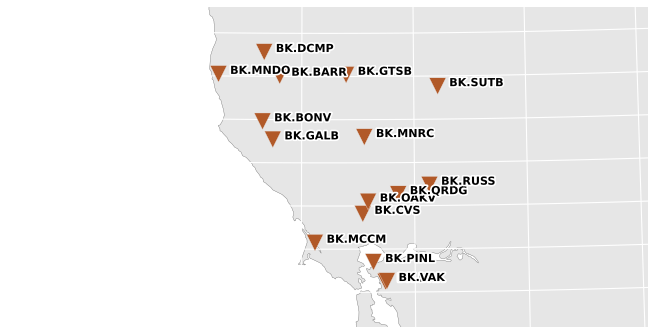

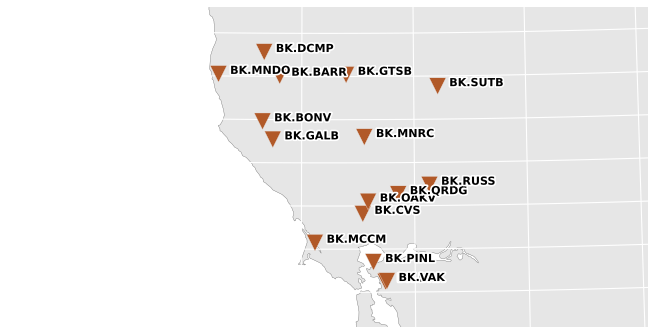

In [201]:
plt.rcParams['figure.figsize'] = 10,5
inv.plot(projection='local',resolution="f",show=False)

### Rotating the waveforms

In [7]:
from obspy.geodetics import gps2dist_azimuth
dist  = []
ba = []
lat_eq,lon_eq = 55.474, -157.917
for i in range(len(stn_lats)):
    b = gps2dist_azimuth(stn_lats[i],stn_lons[i],lat_eq,lon_eq)
    dist.append(b[0])
    ba.append(b[1])

In [8]:
s_rotate = []
for i in range(len(stns)):
    AC = s.select(station=stns[i]) 
    s_rotate += AC.rotate(method='NE->RT',back_azimuth=ba[i])
s_rotate = obspy.Stream(s_rotate)
s_T = s_rotate.select(channel='*HT')
s_R = s_rotate.select(channel='*HR')

In [9]:
s_t = s_T.copy()
t = np.linspace(0,3600,len(s_t[0].data))
s_t.trim(starttime = s_t[0].stats.starttime+t[np.argmax(s_t[0].data)]-10*60,endtime = s_t[0].stats.starttime+t[np.argmax(s_t[0].data)]+15*60)
s_t_f = s_t.copy()
s_t_f.filter(type='bandpass',freqmin=2,freqmax=8)

16 Trace(s) in Stream:
BK.BARR.00.HHT | 2021-07-29T06:18:56.700000Z - 2021-07-29T06:43:56.700000Z | 100.0 Hz, 150001 samples
BK.BONV.00.HHT | 2021-07-29T06:18:56.703130Z - 2021-07-29T06:43:56.703130Z | 100.0 Hz, 150001 samples
BK.BRK.00.HHT  | 2021-07-29T06:18:56.698393Z - 2021-07-29T06:43:56.698393Z | 100.0 Hz, 150001 samples
BK.CVS.00.HHT  | 2021-07-29T06:18:56.698393Z - 2021-07-29T06:43:56.698393Z | 100.0 Hz, 150001 samples
BK.DCMP.00.HHT | 2021-07-29T06:18:56.703130Z - 2021-07-29T06:43:56.703130Z | 100.0 Hz, 150001 samples
BK.GALB.00.HHT | 2021-07-29T06:18:56.700000Z - 2021-07-29T06:43:56.700000Z | 100.0 Hz, 150001 samples
BK.GTSB.00.HHT | 2021-07-29T06:18:56.700470Z - 2021-07-29T06:43:56.700470Z | 100.0 Hz, 150001 samples
BK.MCCM.00.HHT | 2021-07-29T06:18:56.698393Z - 2021-07-29T06:43:56.698393Z | 100.0 Hz, 150001 samples
BK.MNDO.00.HHT | 2021-07-29T06:18:56.700000Z - 2021-07-29T06:43:56.700000Z | 100.0 Hz, 150001 samples
BK.MNRC.00.HHT | 2021-07-29T06:18:56.698393Z - 2021-07-29T0

In [10]:
s_r = s_R.copy()
t = np.linspace(0,3600,len(s_r[0].data))
s_r.trim(starttime = s_r[0].stats.starttime+t[np.argmax(s_r[0].data)]-10*60,endtime = s_r[0].stats.starttime+t[np.argmax(s_r[0].data)]+15*60)
s_r_f = s_r.copy()
s_r_f.filter(type='bandpass',freqmin=2,freqmax=8)

16 Trace(s) in Stream:
BK.BARR.00.HHR | 2021-07-29T06:19:59.600000Z - 2021-07-29T06:44:59.600000Z | 100.0 Hz, 150001 samples
BK.BONV.00.HHR | 2021-07-29T06:19:59.603131Z - 2021-07-29T06:44:59.603131Z | 100.0 Hz, 150001 samples
BK.BRK.00.HHR  | 2021-07-29T06:19:59.598393Z - 2021-07-29T06:44:59.598393Z | 100.0 Hz, 150001 samples
BK.CVS.00.HHR  | 2021-07-29T06:19:59.598393Z - 2021-07-29T06:44:59.598393Z | 100.0 Hz, 150001 samples
BK.DCMP.00.HHR | 2021-07-29T06:19:59.603130Z - 2021-07-29T06:44:59.603130Z | 100.0 Hz, 150001 samples
BK.GALB.00.HHR | 2021-07-29T06:19:59.600000Z - 2021-07-29T06:44:59.600000Z | 100.0 Hz, 150001 samples
BK.GTSB.00.HHR | 2021-07-29T06:19:59.600470Z - 2021-07-29T06:44:59.600470Z | 100.0 Hz, 150001 samples
BK.MCCM.00.HHR | 2021-07-29T06:19:59.598393Z - 2021-07-29T06:44:59.598393Z | 100.0 Hz, 150001 samples
BK.MNDO.00.HHR | 2021-07-29T06:19:59.600000Z - 2021-07-29T06:44:59.600000Z | 100.0 Hz, 150001 samples
BK.MNRC.00.HHR | 2021-07-29T06:19:59.598393Z - 2021-07-29T0

### 3) Plotting the filtered and unfiltered waveforms to look for correspondence between surface waves and locally triggered earthquakes and to select the best quality data


#### Plotting Transverse component

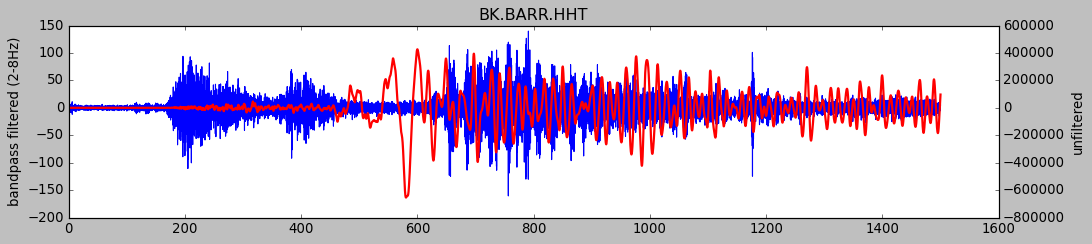

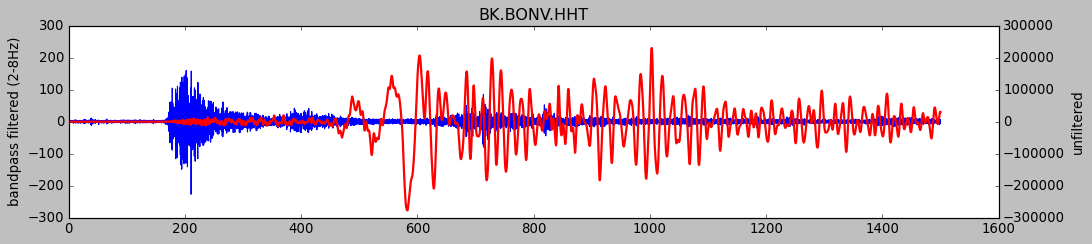

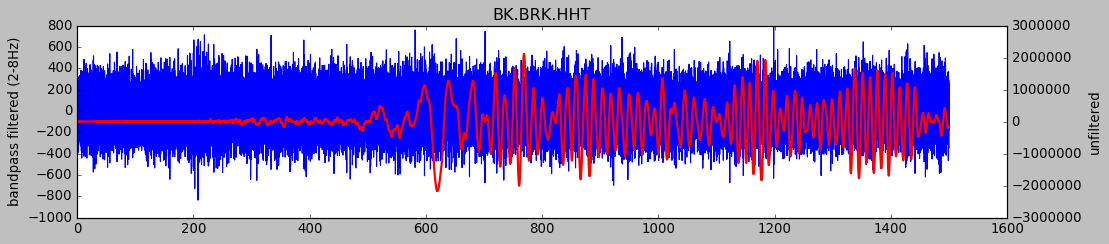

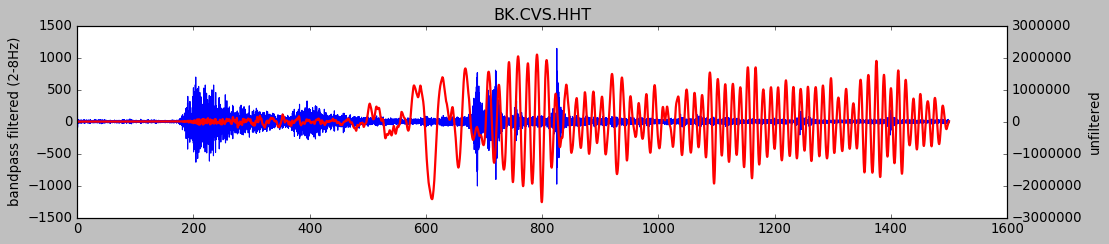

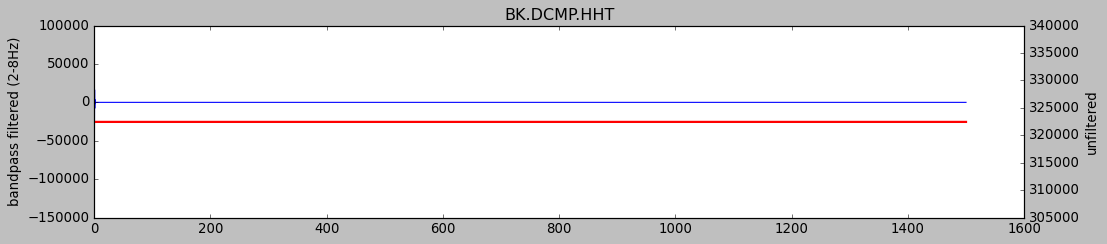

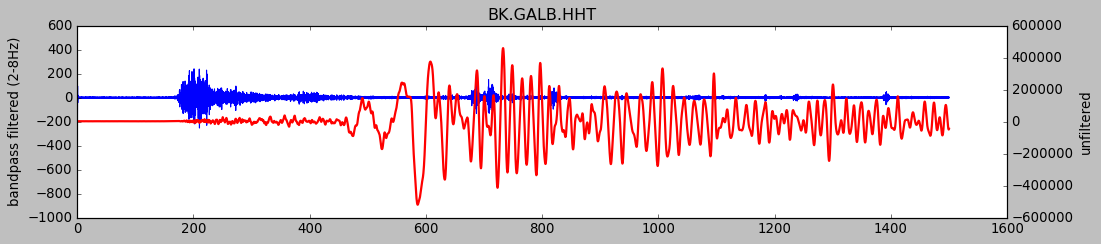

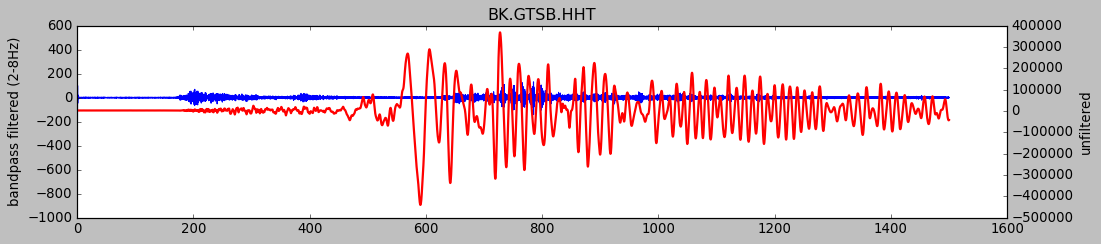

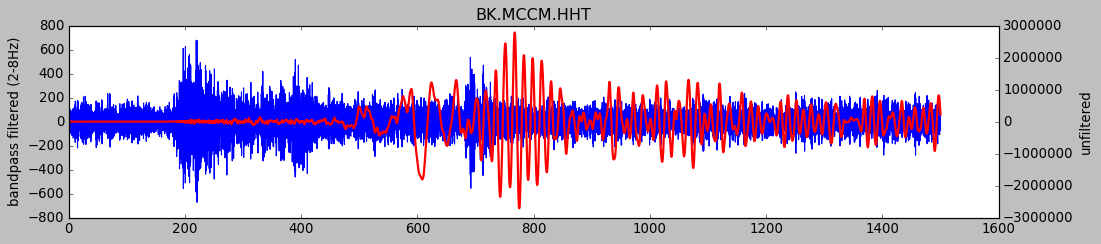

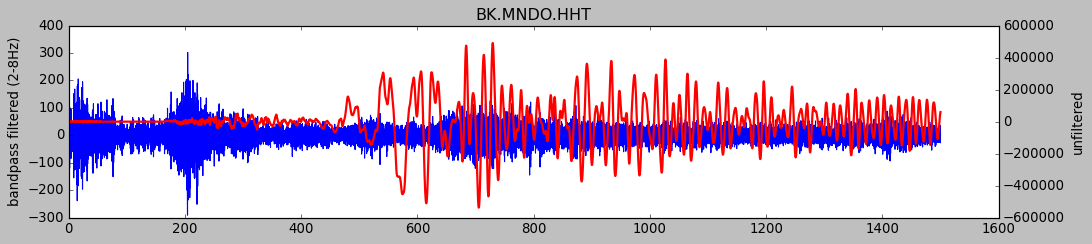

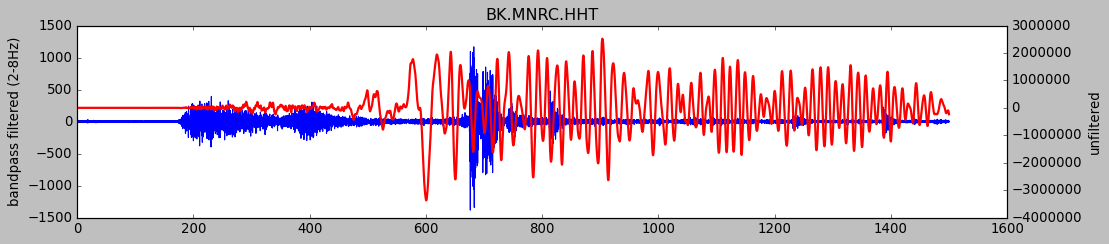

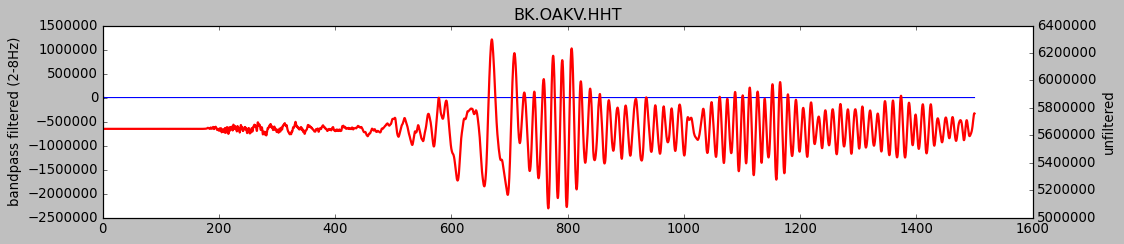

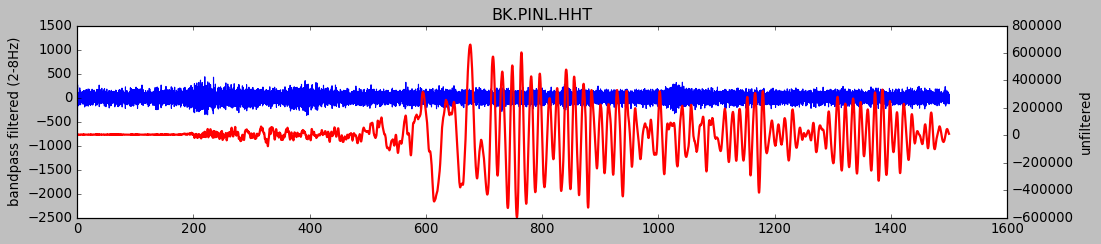

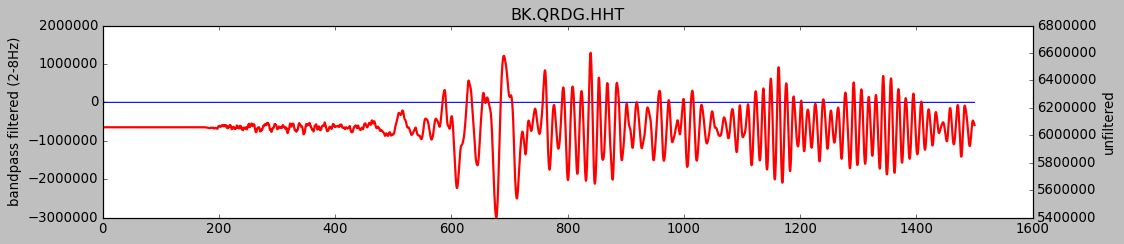

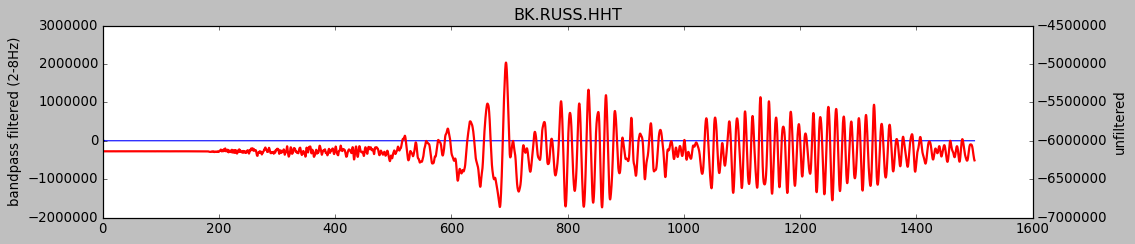

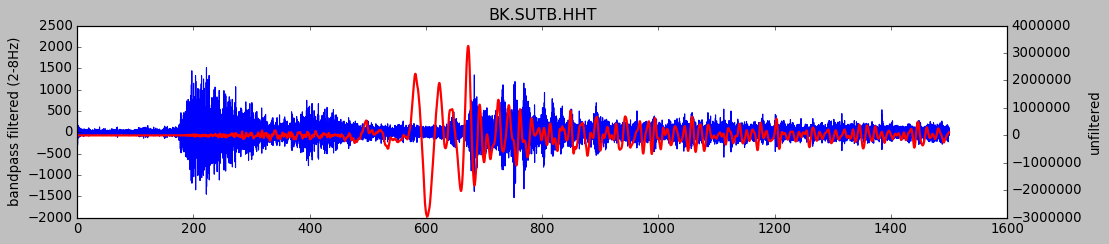

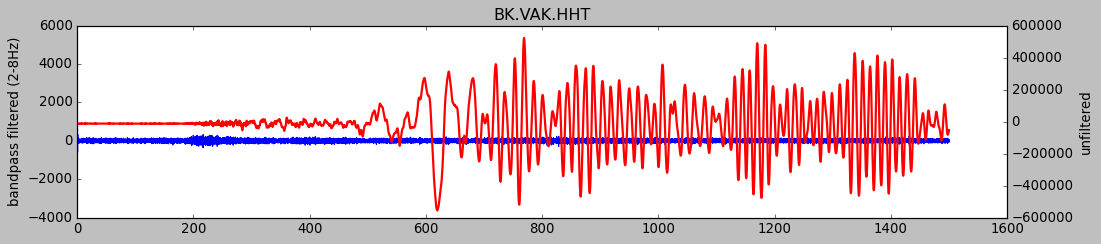

In [11]:
plt.style.use('classic')
for i in range(len(s_t)):
    fig = plt.figure(figsize=[15,3])
    ax1 = fig.add_subplot(111)
    t = np.linspace(0,len(s_t[i].data)*s_t[i].stats.delta,len(s_t[i].data))
    ax1.plot(t,s_t_f[i].data)
    ax1.set_ylabel('bandpass filtered (2-8Hz)')
    #ax1.set_xlim(0,t[-1])
    ax2 = ax1.twinx()
    ax2.plot(t,s_t[i],'r-',label='unfiltered',LineWidth=2)
    ax2.set_ylabel('unfiltered')
    #ax2.set_xlim(700,1200)
    plt.title(s_t[i].stats.network+'.'+s_t[i].stats.station+'.'+s_t[i].stats.channel)

### Plotting the Radial component

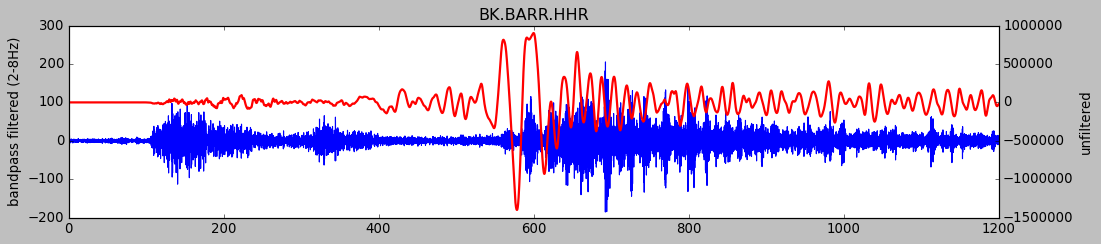

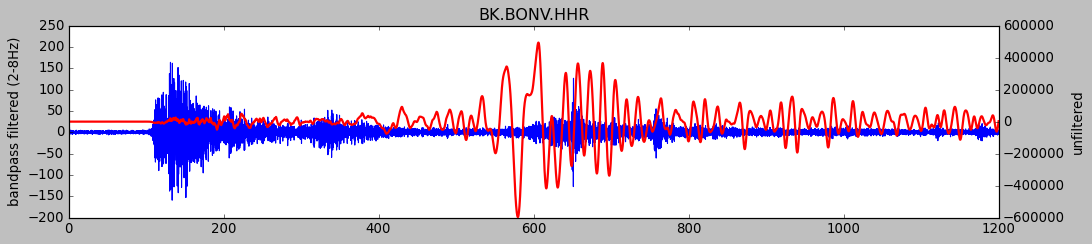

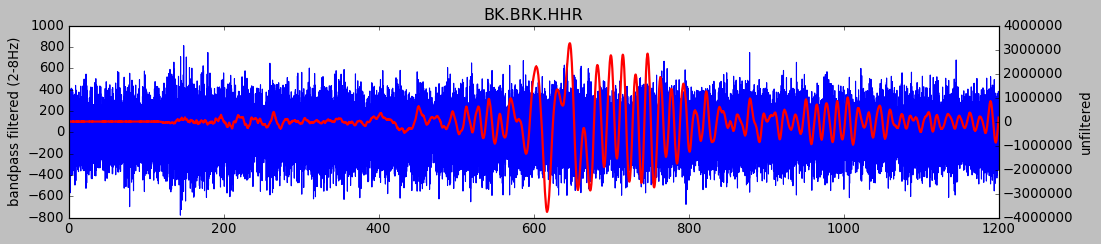

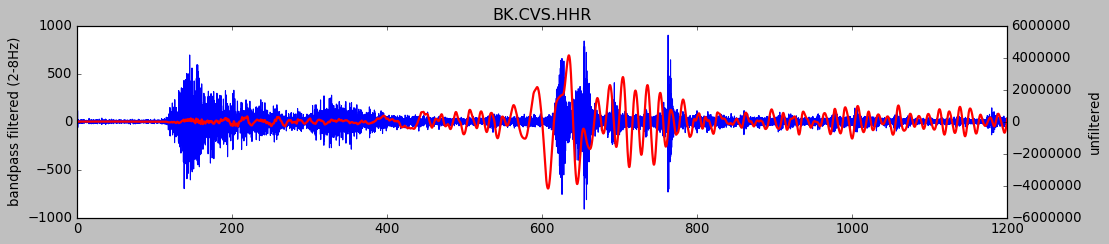

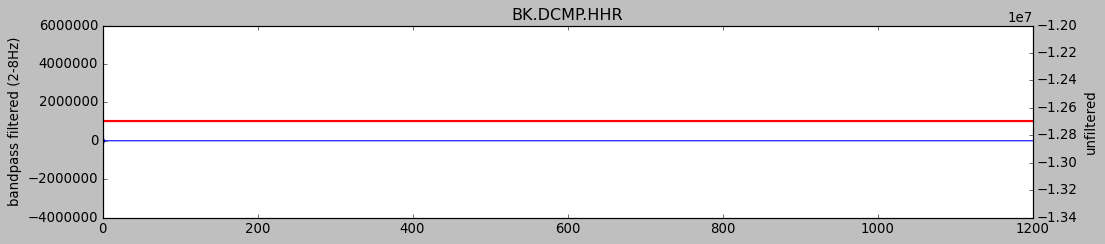

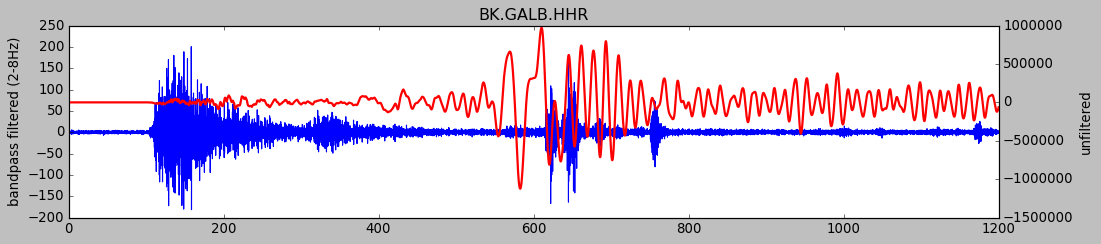

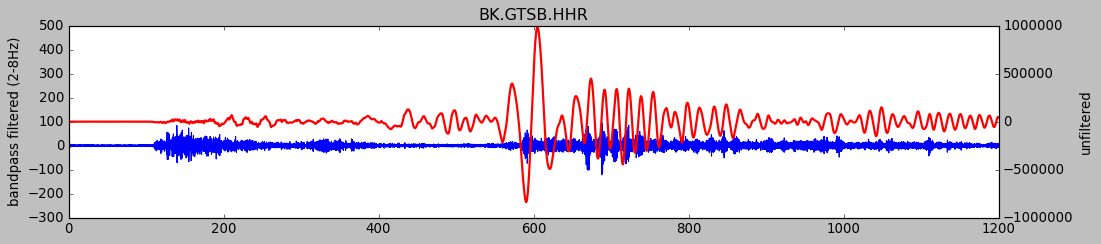

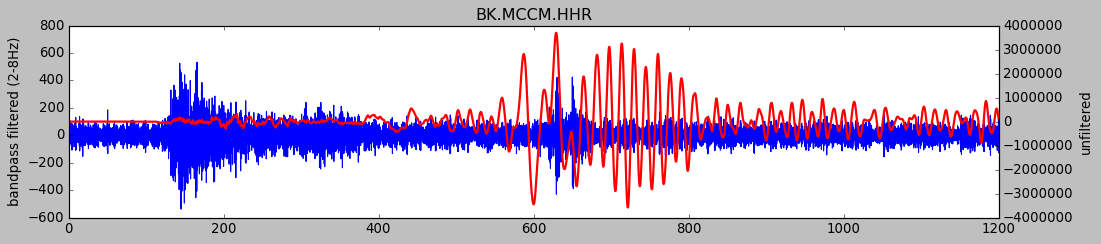

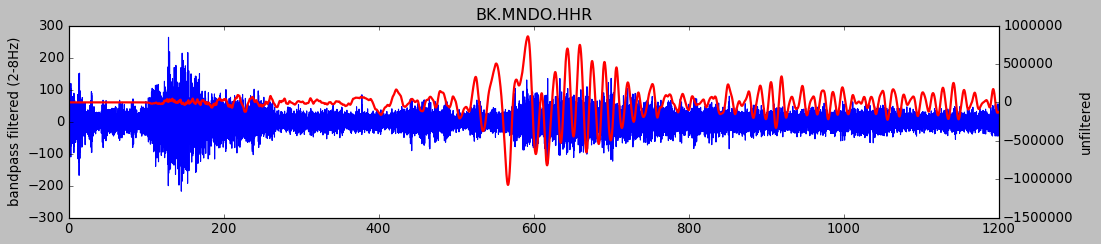

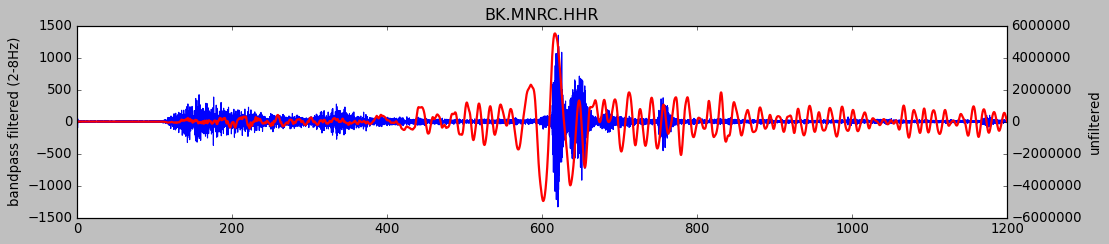

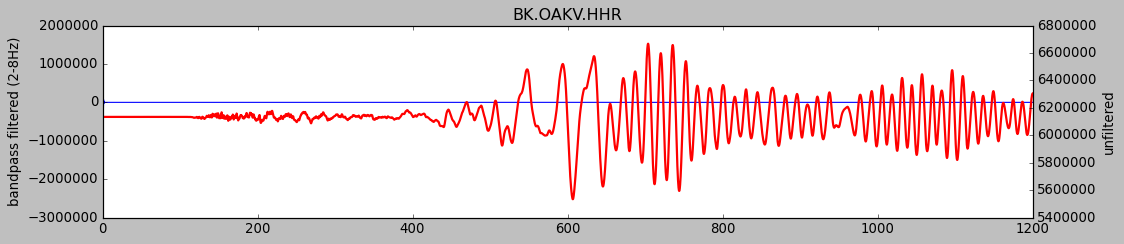

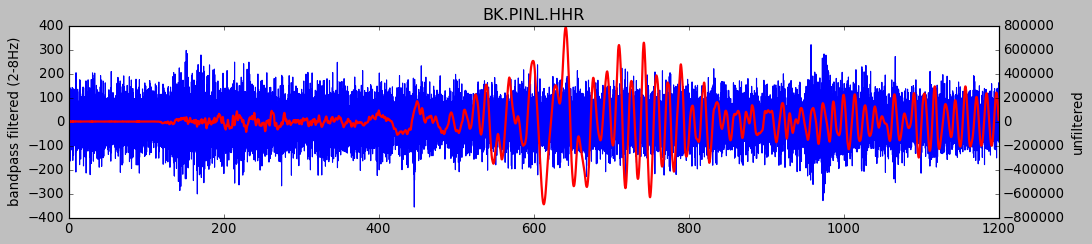

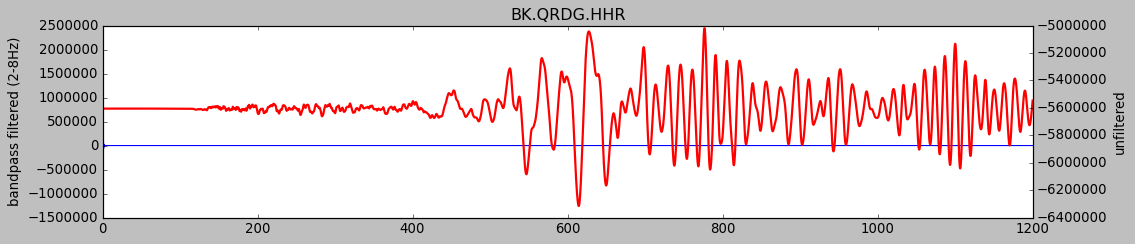

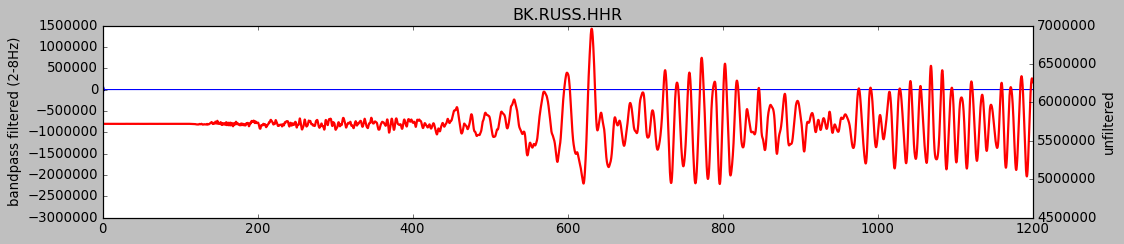

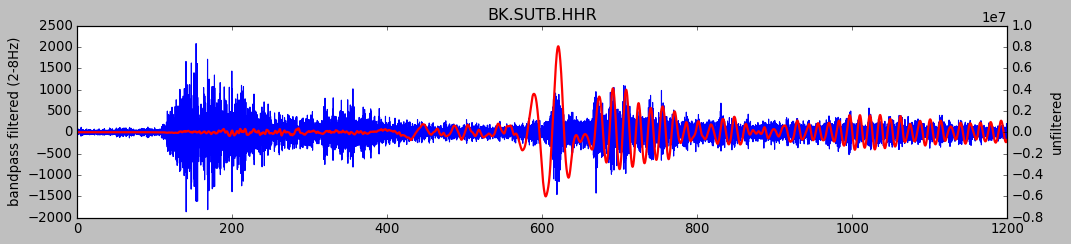

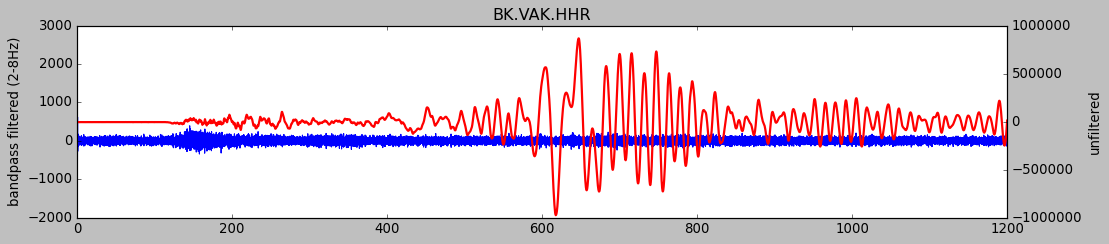

In [12]:
plt.style.use('classic')
for i in range(len(s_r)):
    fig = plt.figure(figsize=[15,3])
    ax1 = fig.add_subplot(111)
    t = np.linspace(0,len(s_r[i].data)*s_r[i].stats.delta,len(s_r[i].data))
    ax1.plot(t,s_r_f[i].data)
    ax1.set_ylabel('bandpass filtered (2-8Hz)')
    #ax1.set_xlim(0,t[-1])
    ax2 = ax1.twinx()
    ax2.plot(t,s_r[i],'r-',label='unfiltered',LineWidth=2)
    ax2.set_ylabel('unfiltered')
    ax2.set_xlim(0,1200)
    plt.title(s_r[i].stats.network+'.'+s_r[i].stats.station+'.'+s_r[i].stats.channel)

Ok so we can see there is some activity going arond the time of surface waves arrival at some of the stations. We will select those stations and investigate them in more detail

### Selecting the waveforms whose quality is good

In [13]:
for i in range(len(stn_lats)):
    s_t[i].stats.distance = dist[i]
    s_t[i].stats.latitude = stn_lats[i]
    s_t[i].stats.longitude = stn_lons[i]
    s_r[i].stats.distance = dist[i]
    s_r[i].stats.latitude = stn_lats[i]
    s_r[i].stats.longitude = stn_lons[i]

In [30]:
s_t_good = []
s_r_good = []
s_t_f_good = []
s_r_f_good = []

sta_list = ['BARR','GTSB','MNDO','SUTB']
for sta in sta_list:
    s_t_good += s_t.select(station=sta)
    s_r_good += s_r.select(station=sta)
    s_t_f_good += s_t_f.select(station=sta)
    s_r_f_good += s_r_f.select(station=sta)
    
s_t_good = obspy.Stream(s_t_good)
s_r_good = obspy.Stream(s_r_good)
s_t_f_good = obspy.Stream(s_t_f_good)
s_r_f_good = obspy.Stream(s_r_f_good)

In [31]:
stn_lats_good = []
stn_lons_good = []
for i in range(len(s_t_good)):
    stn_lats_good.append(s_t_good[i].stats.latitude)
    stn_lons_good.append(s_t_good[i].stats.longitude)

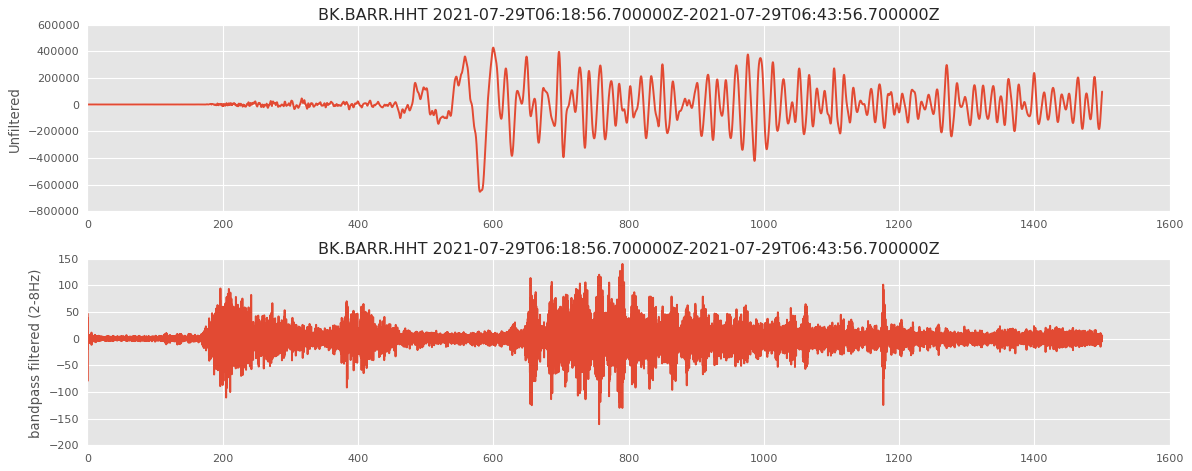

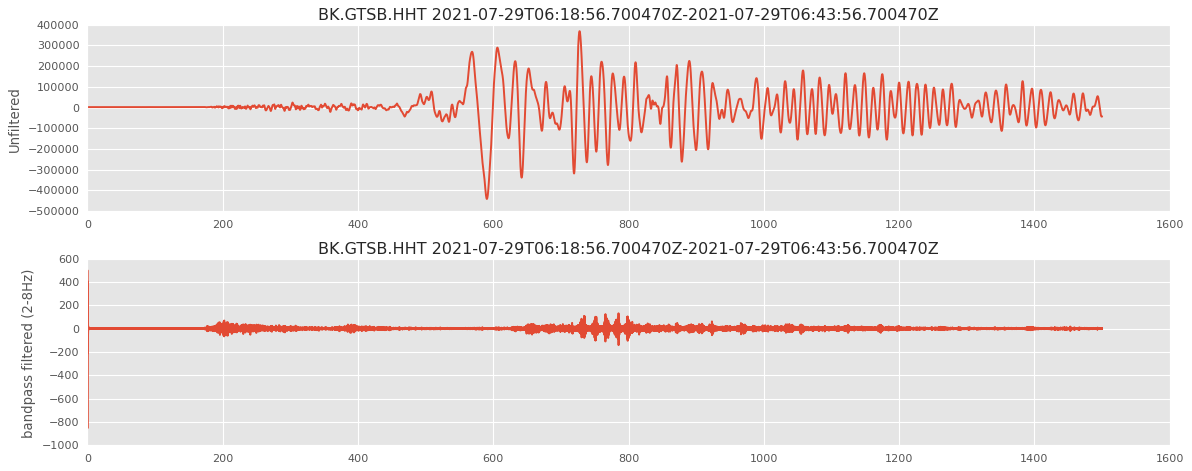

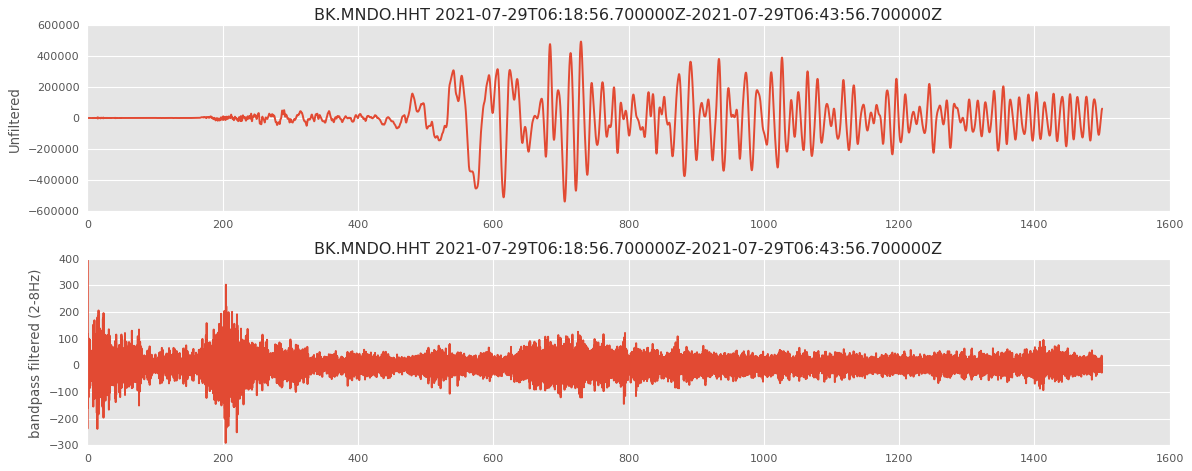

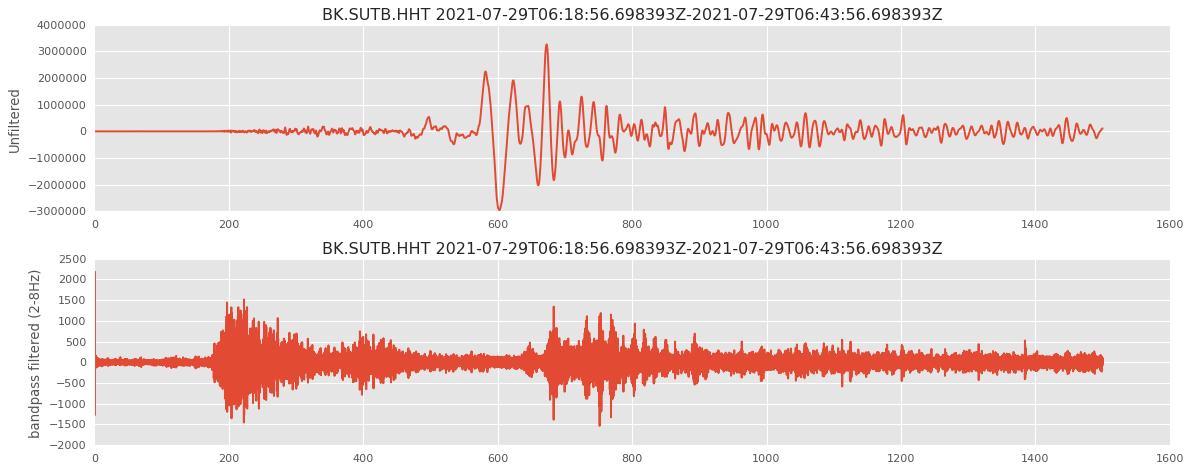

In [32]:
plt.style.use('ggplot')
for i in range(len(s_t_f_good)):
    fig,ax1 = plt.subplots(2,1,figsize=[15,6])
    t = np.linspace(0,len(s_t_f_good[i].data)*s_t_f_good[i].stats.delta,len(s_t_f_good[i].data))
    #ax1.set_xlim(t[np.argmax(s_n_f[i].data[500:-1])]-200,t[np.argmax(s_n_f[i].data[500:-1])]+200)
    #ax1[1].set_xlim(500,1200)
    ax1[1].plot(t,s_t_f_good[i].data)
    ax1[1].set_ylabel('bandpass filtered (2-8Hz)')
    ax1[1].set_title(s_t_f_good[i].stats.network+'.'+s_t_f_good[i].stats.station+'.'+s_t_f_good[i].stats.channel+' '+
             str(s_t_f_good[i].stats.starttime)+'-'+str(s_t_f_good[i].stats.endtime))
    #ax1[0].set_xlim(500,1200)
    ax1[0].plot(t,s_t_good[i].data)
    ax1[0].set_ylabel('Unfiltered')
    ax1[0].set_title(s_t_good[i].stats.network+'.'+s_t_good[i].stats.station+'.'+s_t_good[i].stats.channel+' '+
             str(s_t_good[i].stats.starttime)+'-'+str(s_t_good[i].stats.endtime))
    fig.tight_layout()

### Ok so at nearly all the stations above it is oberved that a number of tremors are arriving starting around 700 seconds, in the correspondence of higher mode surface waves. 

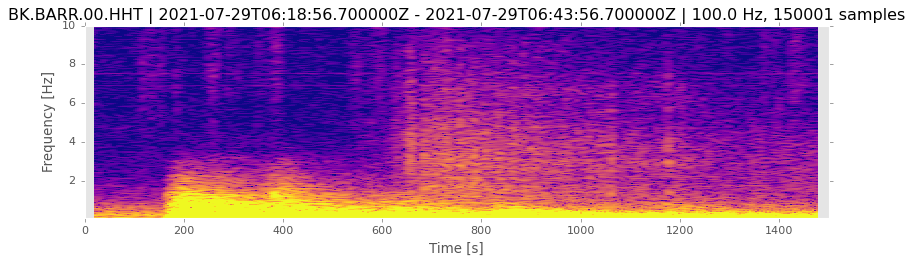

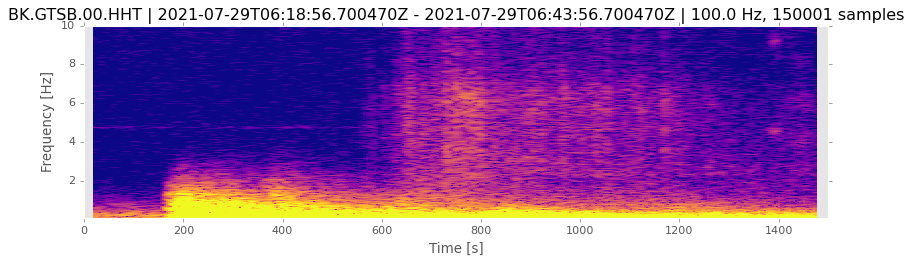

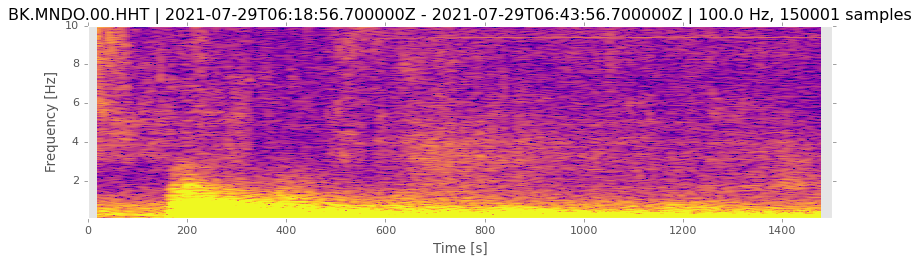

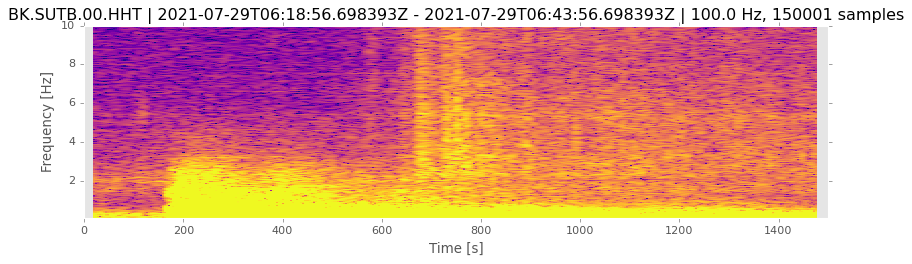

In [228]:
for i in range(len(s_t_good)):
    plt.rcParams['figure.figsize'] = 12,3
    fig = s_t_good[i].spectrogram(show=False,wlen=50,dbscale=True,cmap='plasma')
    ax = fig.axes[0]
    ax.set_ylim(0.1,10)
    #ax.set_xlim(400,800)
    im = ax.images[0]
    im.set_clim(vmin=-10,vmax=50)

### Spectrograms are also showing an evidence of the triggered seismicity around 700 seconds

# We will now investigate the 'NEIC' and 'ISC' catalog to see if these events are present or not and also to look for the delayed response

In [17]:
t1 = UTCDateTime("2021-07-29T05:00:00")
client = Client('IRIS')
cat = client.get_events(starttime=t1, endtime=t1+3*3600, minmagnitude=0,latitude=stn_lats[0],longitude=stn_lons[0],minradius=0,maxradius=1)
cat1 = client.get_events(starttime=t1-12*3600, endtime=t1+12*3600, minmagnitude=0,latitude=stn_lats[0],longitude=stn_lons[0],minradius=0,maxradius=1)

In [18]:
cat

15 Event(s) in Catalog:
2021-07-29T07:50:25.750000Z | +38.780, -122.712 | 0.88 Md
2021-07-29T06:41:54.990000Z | +38.842, -122.807 | 1.24 Md
...
2021-07-29T06:30:26.410000Z | +38.765, -122.708 | 2.97 Md
2021-07-29T06:30:05.250000Z | +38.745, -122.696 | 2.24 Md
To see all events call 'print(CatalogObject.__str__(print_all=True))'

Text(0.5, 1.0, 'Seismicity near Long Valley Caldera')

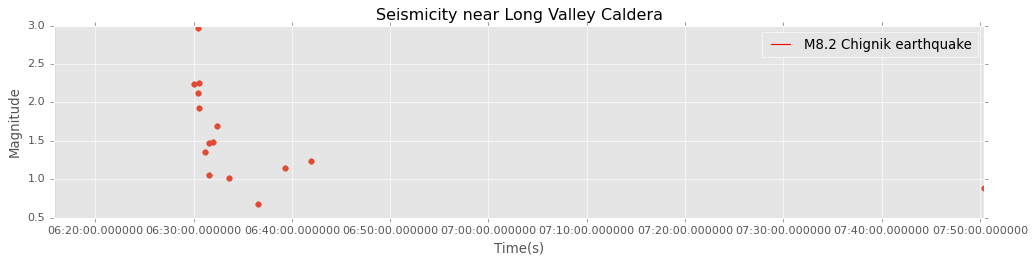

In [22]:
import matplotlib.dates as mdates
origin_time = obspy.UTCDateTime(2021, 7, 29, 6, 15, 49)
ev_lats = []
ev_lons = []
ev_depths = []
mags_1 = []
times = []
for event in cat:
    ev_lats.append(event.origins[0].latitude)
    ev_lons.append(event.origins[0].longitude)
    ev_depths.append(event.origins[0].depth)
    mags_1.append(event.magnitudes[0].mag)
    times.append(event.origins[0].time)
mags_1 = np.array(mags_1)
ev_depths = np.array(ev_depths)
times = mdates.date2num(times)
mtimes1 = mdates.date2num(origin_time)
fig1 = plt.subplots(1,1,figsize=[15,3])
plt.plot_date(times,mags_1,marker='.',MarkerSize=10)
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.axvline(mtimes1,color='r',label='M8.2 Chignik earthquake')
plt.legend()
plt.title('Seismicity near Long Valley Caldera')

Text(0.5, 1.0, 'Seismicity near Geysers')

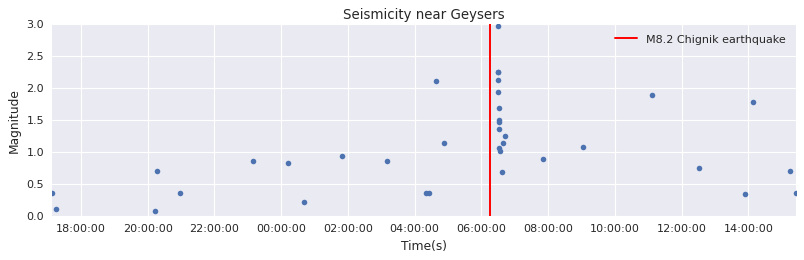

In [23]:
times = []
mags =[]
for event in cat1:
    times.append(event.origins[0].time)
    mags.append(event.magnitudes[0].mag)
    
import matplotlib.dates as mdates
mtimes = mdates.date2num(times)
ev_o_time = UTCDateTime(2021,7,29,6,15,0)
mtimes1 = mdates.date2num(ev_o_time)
plt.style.use('seaborn')


fig1 = plt.subplots(1,1,figsize=[12,3])
plt.plot_date(mtimes,mags,marker='.',MarkerSize=10)
plt.xlabel('Time(s)')
plt.ylabel('Magnitude')
plt.axvline(mtimes1,color='r',label='M8.2 Chignik earthquake')
plt.legend()
plt.title('Seismicity near Geysers')

In [24]:
from numpy import math
from math import factorial as fact
mean = len(cat1)/24 ## No. of earthquakes per hour
e = 2.718
p = []
for i in range(10):
    p.append(((mean)**(i))*(e**(-mean))/fact(i))


(0.0, 0.01)

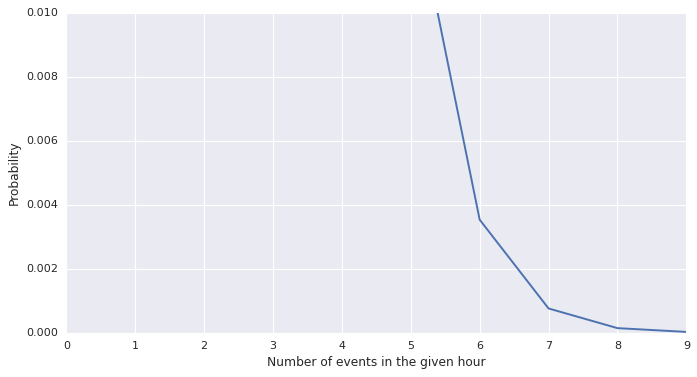

In [25]:
plt.figure(figsize=[10,5])
plt.plot(p)
plt.ylabel('Probability')
plt.xlabel('Number of events in the given hour')
plt.ylim(0,0.01)

In [26]:
import pygmt

plot [WARNING]: Cannot use auto-legend -l for variable symbol color. Option -l ignored.


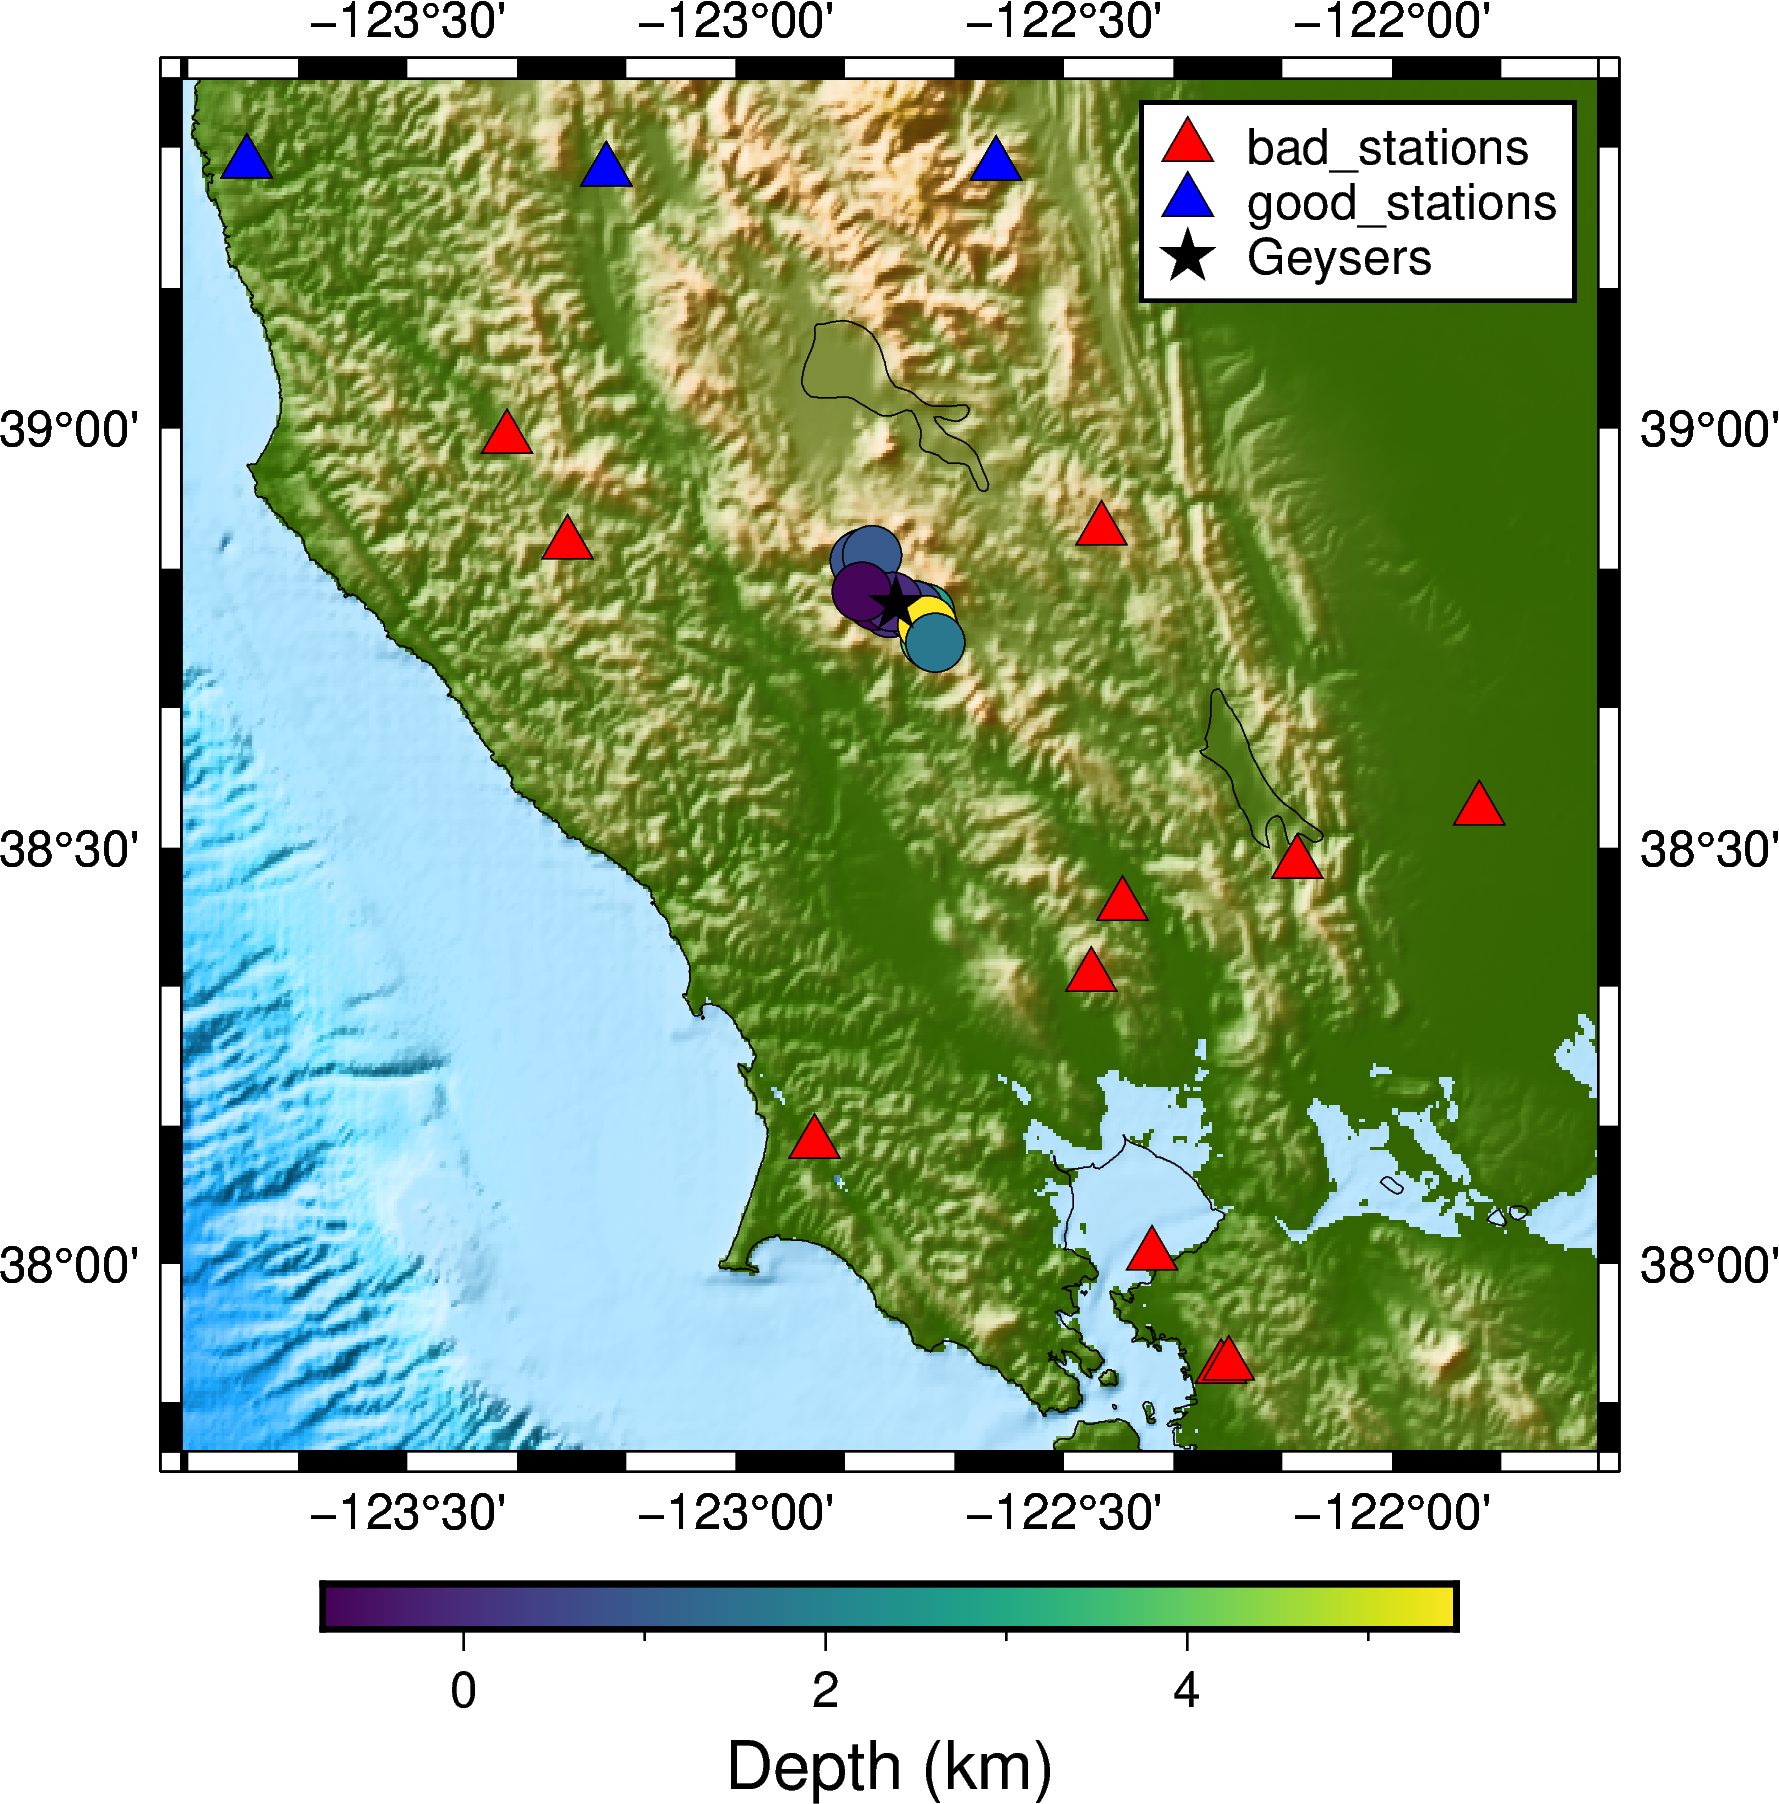

In [33]:
## Salcha earthquake
plt.rcParams['figure.figsize'] = 10,10
region=[np.min(stn_lons)-0.1,np.max(stn_lons_good)+0.1,np.min(stn_lats)-0.1,np.max(stn_lats_good)+0.1]
fig = pygmt.Figure()


pygmt.makecpt(cmap='etopo1',series='-10000/10000/1000',continuous=True)

topo_data = '@earth_relief_15s'
mag_size = 0.01 *2** mags_1

fig.grdimage(grid=topo_data,region=region,projection='M12c',shading=True,frame=True)
pygmt.makecpt(cmap="viridis", series=[np.min(ev_depths/1000), np.max(ev_depths/1000)])
fig.coast(
    shorelines=True,
    frame=True,)

fig.plot(
    x=stn_lons,
    y=stn_lats,
    style= 't0.5c',
    color = 'red',
    pen='black',
    label=f'bad_stations',
)


fig.plot(
    x=stn_lons_good,
    y=stn_lats_good,
    style='t0.5c',
    color='blue',
    pen='black',
    label=f'good_stations',
)


fig.plot(
    x=ev_lons,
    y=ev_lats,
    style= 'c0.5c',
    color = ev_depths/1000,
    sizes = mag_size,
    cmap = True,
    pen='black',
    label=f'Earthquakes',
)

fig.plot(x=lon,y=lat,style='a0.5c',color='black',label=f'Geysers')
fig.colorbar(frame='af+l"Depth (km)"')

fig.legend()
fig.show()

###  All the stations which recorded good quality waveforms were located towards north of the geothermal field.

grdblend [WARNING]: File @N30W130.earth_relief_15s_p.nc has different increments (0.00416666666667/0.00416666666667) than the output grid (0.000833333333333/0.000833333333333) - must resample
grdblend [WARNING]: File @N30W130.earth_relief_15s_p.nc coordinates are phase-shifted w.r.t. the output grid - must resample
plot [WARNING]: Cannot use auto-legend -l for variable symbol color. Option -l ignored.


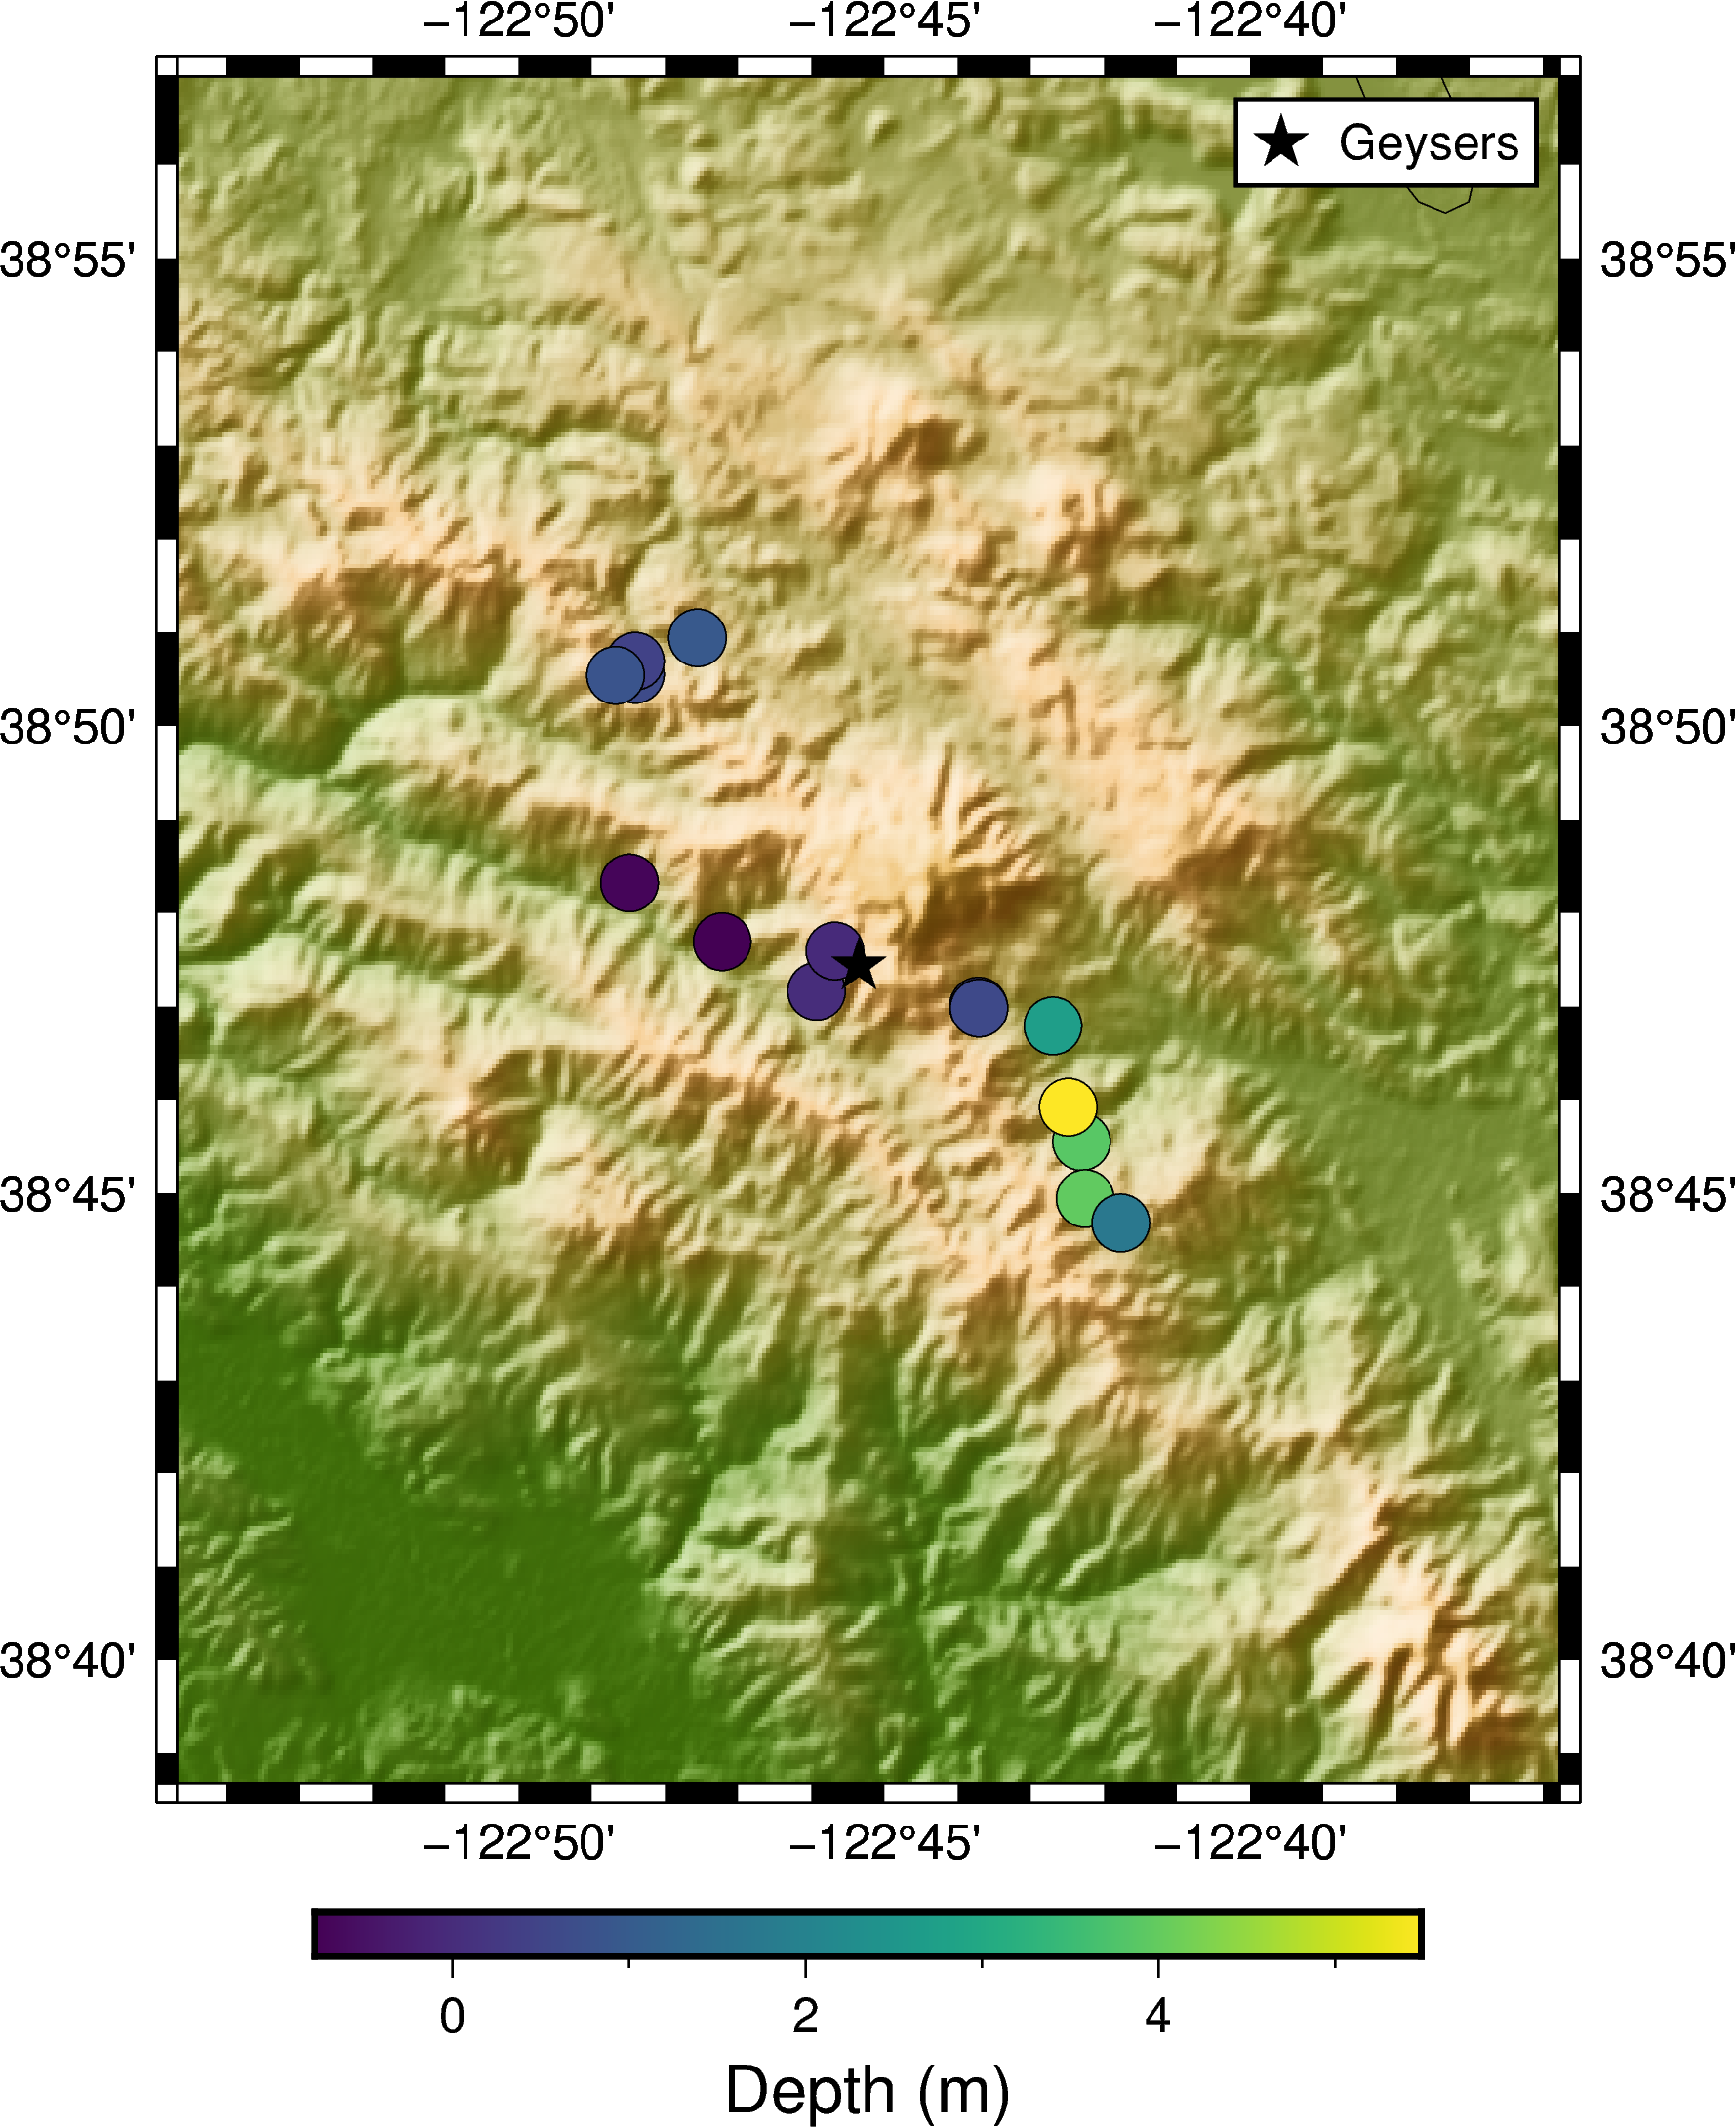

In [34]:
## Salcha earthquake
plt.rcParams['figure.figsize'] = 10,10
region=[np.min(ev_lons)-0.1,np.max(ev_lons)+0.1,np.min(ev_lats)-0.1,np.max(ev_lats)+0.1]
fig = pygmt.Figure()


pygmt.makecpt(cmap='etopo1',series='-10000/10000/1000',continuous=True)

topo_data = '@earth_relief_03s'
mag_size = 0.01 *2** mags_1

fig.grdimage(grid=topo_data,region=region,projection='M12c',shading=True,frame=True)
pygmt.makecpt(cmap="viridis", series=[np.min(ev_depths/1000), np.max(ev_depths/1000)])
fig.coast(
    shorelines=True,
    frame=True,)

fig.plot(
    x=ev_lons,
    y=ev_lats,
    style= 'c0.5c',
    color = ev_depths/1000,
    sizes = mag_size,
    cmap = True,
    pen='black',
    label=f'M4.7',
)

fig.plot(x=lon,y=lat,style='a0.5c',color='black',label=f'Geysers')
fig.colorbar(frame='af+l"Depth (m)"')

fig.legend()
fig.show()

### A linear trend was observed in the locations of all the events, suggesting they could have a common origin, possibly the northwest - southeast trending fault??

# We will pick up one good station and analyze these earthquakes in detail now

In [38]:
sfiles = os.listdir('waveforms_geysers')
s = []
for i in range(len(sfiles)):
    s += obspy.read('waveforms_geysers//'+sfiles[i])

s = obspy.Stream(s)

In [39]:
tr = s.select(station='SUTB')
inv1 = inv.select(station='SUTB')
tr.remove_response(inventory=inv1,output='DISP')

lon1, lat1 = inv1[0][0].longitude, inv1[0][0].latitude
b = gps2dist_azimuth(lat1,lon1,lat_eq,lon_eq)
tr_rotate = tr.rotate(method='NE->RT',back_azimuth=b[1])
ba

(3217517.6901750364, 316.1380469067672, 108.89075148554629)

In [40]:
tr_f = tr_rotate.copy()
tr_f_1 = tr_rotate.copy()

tr_f = tr_f.filter(type='bandpass',freqmin=2,freqmax=8)
tr_f_1 = tr_f_1.filter(type='bandpass',freqmin=0.01,freqmax=0.1)

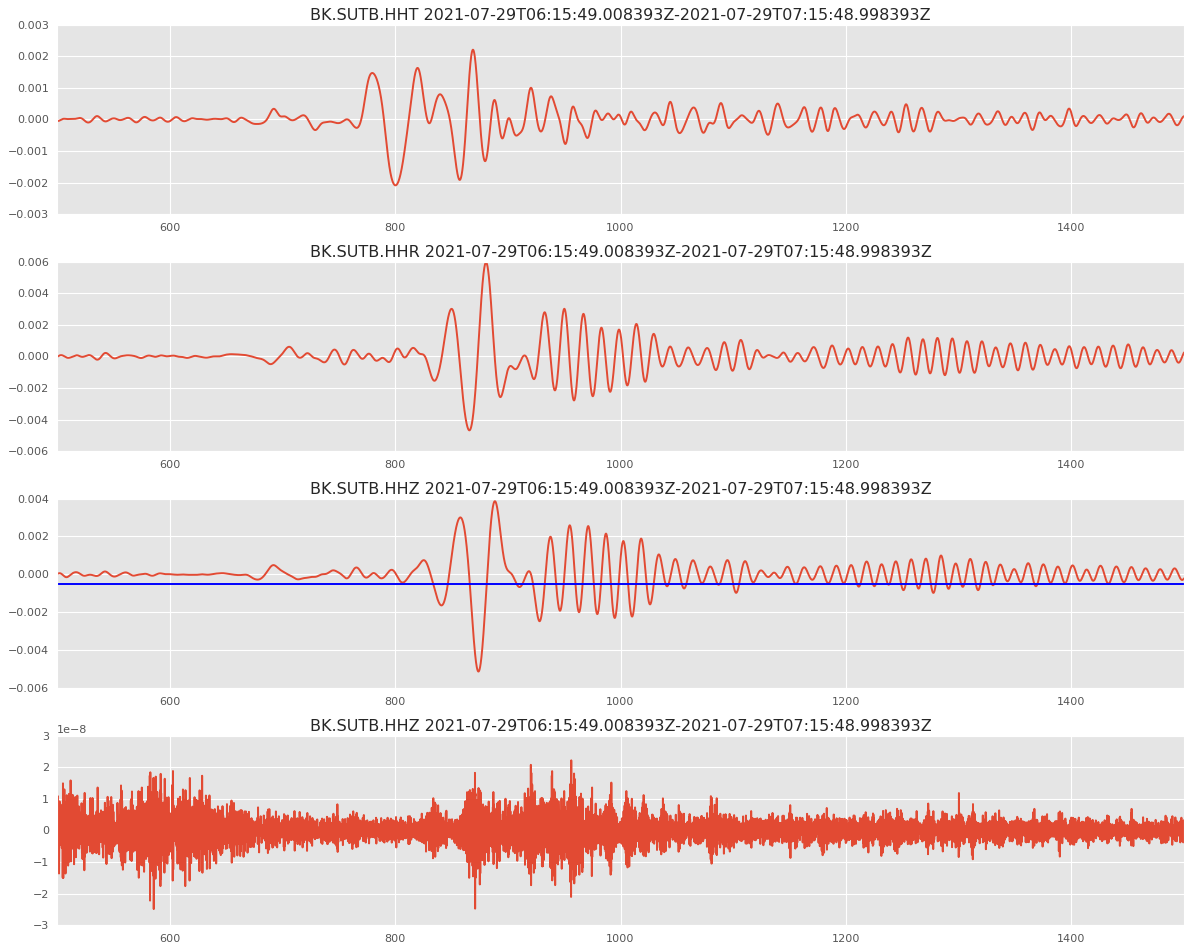

In [41]:
fig,ax = plt.subplots(4,1,figsize=[15,12])
t = np.linspace(0,3600,len(tr_f[0].data))
ax[0].plot(t,tr_f_1[0].data)
ax[0].set_xlim(500,1500)
ax[0].set_title(tr_f_1[0].stats.network+'.'+tr_f_1[0].stats.station+'.'+tr_f_1[0].stats.channel+' '+
             str(tr_f_1[0].stats.starttime)+'-'+str(tr_f_1[0].stats.endtime))

ax[1].plot(t,tr_f_1[1].data)
ax[1].set_xlim(500,1500)
ax[1].set_title(tr_f_1[1].stats.network+'.'+tr_f_1[1].stats.station+'.'+tr_f_1[1].stats.channel+' '+
             str(tr_f_1[1].stats.starttime)+'-'+str(tr_f_1[1].stats.endtime))


ax[2].plot(t,tr_f_1[2].data)
ax[2].set_xlim(500,1500)
ax[2].set_title(tr_f_1[2].stats.network+'.'+tr_f_1[2].stats.station+'.'+tr_f_1[2].stats.channel+' '+
             str(tr_f_1[2].stats.starttime)+'-'+str(tr_f_1[2].stats.endtime))
#ax[2].set_ylim(-0.002,-0.0004)
ax[2].axhline(-0.0005)

ax[3].plot(t,tr_f[0].data)
ax[3].set_xlim(500,1500)
ax[3].set_title(tr_f[2].stats.network+'.'+tr_f[2].stats.station+'.'+tr_f[2].stats.channel+' '+
             str(tr_f[2].stats.starttime)+'-'+str(tr_f[2].stats.endtime))
ax[3].set_ylim(-3e-8,3e-8)
fig.tight_layout()

In [42]:
idx = np.where(tr_f_1[2].data < -0.0005)

In [43]:
tarr = []
for i in range(len(idx)):
    tarr.append(t[idx[i]])

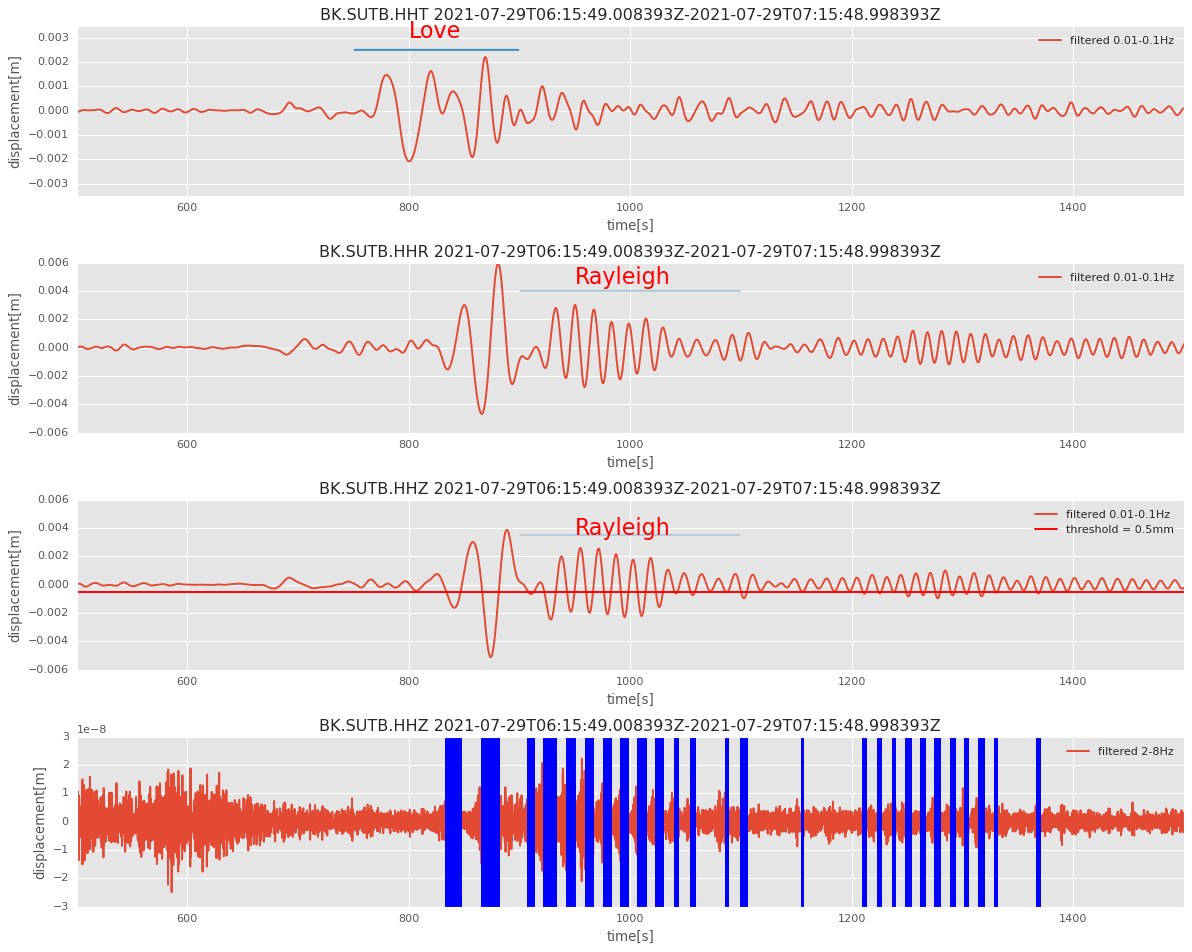

In [44]:
fig,ax = plt.subplots(4,1,figsize=[15,12])
t = np.linspace(0,3600,len(tr_f[0].data))
ax[0].plot(t,tr_f_1[0].data,label='filtered 0.01-0.1Hz')
ax[0].set_xlim(500,1500)
ax[0].set_title(tr_f_1[0].stats.network+'.'+tr_f_1[0].stats.station+'.'+tr_f_1[0].stats.channel+' '+
             str(tr_f_1[0].stats.starttime)+'-'+str(tr_f_1[0].stats.endtime))
ax[0].set_ylabel('displacement[m]')
ax[0].set_xlabel('time[s]')
ax[0].legend()
ax[0].arrow(x=750,y=0.0025,dx=150,dy=0,width=0.0001,length_includes_head=True,shape='full')
ax[0].text(x=800,y=0.003,s='Love',color='red',size=20)
ax[0].set_ylim(-0.0035,0.0035)

ax[1].plot(t,tr_f_1[1].data,label='filtered 0.01-0.1Hz')
ax[1].set_xlim(500,1500)
ax[1].set_title(tr_f_1[1].stats.network+'.'+tr_f_1[1].stats.station+'.'+tr_f_1[1].stats.channel+' '+
             str(tr_f_1[1].stats.starttime)+'-'+str(tr_f_1[1].stats.endtime))
ax[1].set_ylabel('displacement[m]')
ax[1].set_xlabel('time[s]')
ax[1].legend()
ax[1].arrow(x=900,y=0.004,dx=200,dy=0,width=0.0001,length_includes_head=True,shape='full')
ax[1].text(x=950,y=0.0045,s='Rayleigh',color='red',size=20)
#ax[0].set_ylim(-0.0035,0.0035)


ax[2].plot(t,tr_f_1[2].data,label='filtered 0.01-0.1Hz')
ax[2].set_xlim(500,1500)
ax[2].set_title(tr_f_1[2].stats.network+'.'+tr_f_1[2].stats.station+'.'+tr_f_1[2].stats.channel+' '+
             str(tr_f_1[2].stats.starttime)+'-'+str(tr_f_1[2].stats.endtime))
#ax[2].set_ylim(-0.002,-0.0004)
ax[2].axhline(-0.0005,color='red',label='threshold = 0.5mm')
ax[2].set_ylabel('displacement[m]')
ax[2].set_xlabel('time[s]')
ax[2].legend()
ax[2].arrow(x=900,y=0.0035,dx=200,dy=0,width=0.0001,length_includes_head=True,shape='full')
ax[2].text(x=950,y=0.0035,s='Rayleigh',color='red',size=20)
ax[2].set_ylim(-0.006,0.006)


ax[3].plot(t,tr_f[0].data,label='filtered 2-8Hz')
ax[3].set_xlim(500,1500)
ax[3].set_title(tr_f[2].stats.network+'.'+tr_f[2].stats.station+'.'+tr_f[2].stats.channel+' '+
             str(tr_f[2].stats.starttime)+'-'+str(tr_f[2].stats.endtime))
ax[3].set_ylim(-3e-8,3e-8)
for i in range(len(tarr[0])):
    ax[3].axvline(tarr[0][i])
ax[3].set_ylabel('displacement[m]')
ax[3].set_xlabel('time[s]')
ax[3].legend()
fig.tight_layout()

## Ok so there is one to one correspondence between the rayleigh wave phases and the triggered earthquakes, further a negative displacement threshold of 0.5 mm is observed to trigger the earthuakes. The rayleigh wave is observed at Z and R component with seemingly higher amplitude on the radial compoent. <br>


## Love wave arrives slightly earlier than Rayleigh waves and the corresponding signature on the Z and R component could be the coupled Love-Rayleigh waves.<br>


## A total of 26 earthquakes were observed in the span of 10 minutes, out of these 26, only 14 were strong enough to be detected and were reported in the catalog <br>

## The dominant period of rayleigh wave was about 15 to 20 seconds.

## The probability of more than 6 earthquakes in a given hour considering the seismicity during 12 hours before and after the Chignik earthquake is nearly zero.

## Considering the above points, it can be concluded that dynamic stress changes caused by surface waves resulting from 2021-07-29 M8.2 Chignik earthquake resulted in a swarm of 26 earthquakes at the site